# Fracción de galaxias por grupo

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../data/tab_gal_gru.dat'
df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'r_abs', 'g_abs'])
id_gc_gal_grup = df.ngc.to_list()

path = '../data/compact_in_all'

df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

**Lista de GCs descartandos por corte de Magnitud**

In [4]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

In [5]:
df = df.reset_index()

**Color**

In [6]:
color = df['g_abs']-df['r_abs']
df['color'] = color

In [7]:
df.head(6)

,ngc,nk,alg,delg,zred,rmag,gmag,r_abs,g_abs,color
0,1,1,114.844002,45.118000,0.079785,14.719000,15.661000,-22.374979,-21.561102,0.813877
1,1,2,114.839996,45.124001,0.077575,16.379999,16.885000,-20.607855,-20.128399,0.479456
2,1,3,114.849998,45.082001,0.078914,16.813000,17.693001,-20.251556,-19.490927,0.760630
3,1,4,114.819000,45.088001,0.077670,17.100000,17.959999,-19.926037,-19.180386,0.745651
4,2,1,116.553001,21.996000,0.045715,14.289000,15.159000,-21.512625,-20.698204,0.814421
5,2,2,116.610001,22.034000,0.047243,14.982000,15.809000,-20.894869,-20.125586,0.769283


(0.0, 2.0)

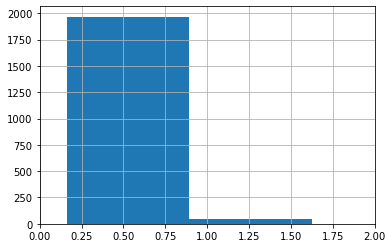

In [8]:
df.color.hist()
plt.xlim(0,2)

In [10]:
df_pasivas = df.groupby(["ngc"])["state"].sum()

KeyError: 'Column not found: state'

In [ ]:
len(df_pasivas.values)

In [ ]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

**Match**

In [ ]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [ ]:
df1_sort.head(2)

In [ ]:
df_final = df1_sort.join(df_pasivas_sort)

In [ ]:
df_final.shape

In [ ]:
df_final.tail()

In [ ]:
df_final['state'].iloc[0]/df_final['n_m'].iloc[0]

In [ ]:
frecuencia = []
for i in range(df_final.shape[0]):
    frac = df_final.state.iloc[i]/df_final.n_m.iloc[i]
    frecuencia.append(frac)

In [ ]:
frecu_03 = list(map(lambda x: round(x, 3), frecuencia))

In [ ]:
df_final['frac'] = frecu_03

In [ ]:
clases = list(set(df_final.Target))
clases

### Fracción de galaxias pasivas sin distinguir por entorno

In [ ]:
df_final.frac.hist()

In [ ]:
clases

### Diagrama de barras  de fracción de  galaxias pasivas por entorno

In [ ]:
plt.rcParams['figure.figsize'] = 10, 8
plt.figure(figsize=(20,80))


####subfiguras
f, ax = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.5)

df_bar = df_final[df_final['Target']==clases[0]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
ax[0,0].set_title(clases[0])


df_bar = df_final[df_final['Target']==clases[1]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,1].set_title(clases[1])



df_bar = df_final[df_final['Target']==clases[2]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,2].set_title(clases[2])



df_bar = df_final[df_final['Target']==clases[3]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,0].set_title(clases[3])


df_bar = df_final[df_final['Target']==clases[4]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,1].set_title(clases[4])


sns.countplot(x="frac", data= df_final, ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,2].set_title('mean')

plt.savefig('bar_frac.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [ ]:
frac_index = list(set(df_final.frac))

### Diagrama de barras  de fracción de  galaxias pasivas por entorno

In [ ]:
plt.figure(figsize=(20,80))


####subfiguras
f, ax = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.5)

df_bar = df_final[df_final['Target']==clases[0]].sort_values('frac')
sns.boxplot(x="frac", data=df_bar, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
ax[0,0].set_title(clases[0])


df_bar = df_final[df_final['Target']==clases[1]].sort_values('frac')
sns.boxplot(x="frac", data=df_bar, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,1].set_title(clases[1])



df_bar = df_final[df_final['Target']==clases[2]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,2].set_title(clases[2])



df_bar = df_final[df_final['Target']==clases[3]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,0].set_title(clases[3])


df_bar = df_final[df_final['Target']==clases[4]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,1].set_title(clases[4])


sns.boxplot(x="frac", data= df_final, ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,2].set_title('mean')

plt.savefig('hist_box.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [ ]:
sns.boxplot(x='Target', y="frac", data=df_final,  palette="husl", notch= True)
plt.ylabel('fraction of passive galaxies')
plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

In [ ]:
clases = ['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']
my_pal = {"Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Purple"}
sns.boxplot(x=df_final.Target, y=df_final.frac, notch= True, order=[ 
                 'Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR'], palette=my_pal)
plt.ylabel('Fraction of passive galaxies in CGs')
plt.xlabel('Host environment')
plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

In [ ]:
set(df_final.Target)

In [ ]:
from matplotlib.cbook import boxplot_stats

In [ ]:
Node = df_final[df_final['Target']=='Node']
display('Node-frac')
display(boxplot_stats(Node.frac)[0]['med'],
boxplot_stats(Node.frac)[0]['cihi']-boxplot_stats(Node.frac)[0]['med'])

FIl = df_final[df_final['Target']=='FIl']
display('FIl-frac')
display(boxplot_stats(FIl.frac)[0]['med'],
boxplot_stats(FIl.frac)[0]['cihi']-boxplot_stats(FIl.frac)[0]['med'])

Loose = df_final[df_final['Target']=='Loose']
display('Loose-frac')
display(boxplot_stats(Loose.frac)[0]['med'],
boxplot_stats(Loose.frac)[0]['cihi']-boxplot_stats(Loose.frac)[0]['med'])

Field = df_final[df_final['Target']=='Field']
display('Field-frac')
display(boxplot_stats(Field.frac)[0]['med'],
boxplot_stats(Field.frac)[0]['cihi']-boxplot_stats(Field.frac)[0]['med'])

VoiS = df_final[df_final['Target']=='VoiS']
display('VoiS-frac')
display(boxplot_stats(VoiS.frac)[0]['med'],
boxplot_stats(VoiS.frac)[0]['cihi']-boxplot_stats(VoiS.frac)[0]['med'])

VoiR = df_final[df_final['Target']=='VoiR']
display('VoiR-frac')
display(boxplot_stats(VoiR.frac)[0]['med'],
boxplot_stats(VoiR.frac)[0]['cihi']-boxplot_stats(VoiR.frac)[0]['med'])

In [ ]:
df_bar = df_final.groupby(["Target"])["frac"].mean()
# Normalize result
df_bar_pct = df_bar.sort_values().div(df_bar.sum(), axis=0)


ax = df_bar_pct.plot(kind='bar', figsize=(15,4), width=0.8)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.00), ha='center')
    
plt.savefig('bar.eps',format='eps')

# Tomando 7 GCs de forma aleatoria de cada entorno. 

**Submuestras**

In [ ]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
c = list(range(0, df_c0.shape[0])) # Defino una lista haciendo uso de la dim del df_c0
aleatorios = random.sample(c, df_c0.shape[0]) # A esa lista c le doy un 'orden' aleatorio
index = aleatorios 
dfa_c0 = pd.DataFrame(df_c0.frac.values, index=index) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden
dfa_c0 = dfa_c0[0:8] # Tomo 7 gcs de la clase, entiendase clase a los GCs que pertenecen a un dado entorno


df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
c = list(range(0, df_c1.shape[0]))
aleatorios = random.sample(c, df_c1.shape[0])
index = aleatorios
dfa_c1 = pd.DataFrame(df_c1.frac.values, index=index)
dfa_c1 = dfa_c1[0:8]


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
c = list(range(0, df_c2.shape[0]))
aleatorios = random.sample(c, df_c2.shape[0])
index = aleatorios
dfa_c2 = pd.DataFrame(df_c2.frac.values, index=index)
dfa_c2 = dfa_c2[0:8]


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
c = list(range(0, df_c3.shape[0]))
aleatorios = random.sample(c, df_c3.shape[0])
index = aleatorios
dfa_c3 = pd.DataFrame(df_c3.frac.values, index=index)
dfa_c3 = dfa_c3[0:8]


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
c = list(range(0, df_c4.shape[0]))
aleatorios = random.sample(c, df_c4.shape[0])
index = aleatorios
dfa_c4 = pd.DataFrame(df_c4.frac.values, index=index)
dfa_c4 = dfa_c4[0:8]


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
c = list(range(0, df_c5.shape[0]))
aleatorios = random.sample(c, df_c5.shape[0])
index = aleatorios
dfa_c5 = pd.DataFrame(df_c5.frac.values, index=index)
dfa_c5 = dfa_c5[0:8]

In [ ]:
df_frac = pd.DataFrame(dfa_c0.values, columns=['VoidR'])
df_frac['VoidS'] = dfa_c1.values
df_frac['Loose'] = dfa_c2.values
df_frac['Field'] = dfa_c3.values
df_frac['Node'] = dfa_c4.values
df_frac['FIl'] = dfa_c5.values

In [ ]:
df_frac

In [ ]:
voidR = pd.DataFrame(Counter(df_frac.VoidR).values(), index=Counter(df_frac.VoidR).keys(), columns=['voidR'])
voidS = pd.DataFrame(Counter(df_frac.VoidS).values(), index=Counter(df_frac.VoidS).keys(), columns=['voidS'])
Loose = pd.DataFrame(Counter(df_frac.Loose).values(), index=Counter(df_frac.Loose).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_frac.Field).values(), index=Counter(df_frac.Field).keys(), columns=['Field'])
Node = pd.DataFrame(Counter(df_frac.Node).values(), index=Counter(df_frac.Node).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_frac.FIl).values(), index=Counter(df_frac.FIl).keys(), columns=['FIl'])

In [ ]:
df_12 = pd.concat([Node, FIl, Loose, Field, voidS, voidR], axis=1)

In [ ]:
df_12

In [ ]:
# Make a list by cycling through the colors you care about
# to match the length of your data.
from itertools import cycle, islice
my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12.plot(kind='bar', stacked=True, color=my_colors, grid=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.savefig('cg7.eps',format='eps')

# Misma figura pero sin considerar submuestras

In [ ]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
dfa_c0 = pd.DataFrame(df_c0.frac.values) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden

df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
dfa_c1 = pd.DataFrame(df_c1.frac.values)


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
dfa_c2 = pd.DataFrame(df_c2.frac.values)


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
dfa_c3 = pd.DataFrame(df_c3.frac.values)


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
dfa_c4 = pd.DataFrame(df_c4.frac.values)


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
dfa_c5 = pd.DataFrame(df_c5.frac.values)

#########################################################################################
voidR = pd.DataFrame(Counter(df_c0.frac).values(), index=Counter(df_c0.frac).keys(), columns=['voidR'])
voidS = pd.DataFrame(Counter(df_c1.frac).values(), index=Counter(df_c1.frac).keys(), columns=['voidS'])
Loose = pd.DataFrame(Counter(df_c2.frac).values(), index=Counter(df_c2.frac).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_c3.frac).values(), index=Counter(df_c3.frac).keys(), columns=['Field'])
Node = pd.DataFrame(Counter(df_c4.frac).values(), index=Counter(df_c4.frac).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_c5.frac).values(), index=Counter(df_c5.frac).keys(), columns=['FIl'])


df_12_19 = pd.concat([Node, FIl, Loose, Field, voidS, voidR], axis=1)
display(df_12_19.head(2))

In [ ]:
df_12_19.voidS

In [ ]:
# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_19)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12_19.plot(kind='bar', stacked=True, color=my_colors, grid=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=70, ha="right")
#plt.xlim(0., 0.4)
plt.savefig('cg1219.eps',format='eps')


In [ ]:
df_12_19.head(2)

In [ ]:
df_12_22 = df_12_19.reset_index().copy()
df_12_22 = df_12_22.rename(columns={'index': 'frac'})
df_12_22 = df_12_22.fillna(0)
df_12_22.head(2)

https://kodlogs.com/33984/the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous-use-a-any-or-a-all

In [ ]:
df_12_22.loc[df_12_22.frac < 0.2] 

In [ ]:
df_12_22.loc[df_12_22.frac < 0.2, 'frac'] 

In [ ]:
df_12_22

In [ ]:
# Binning of the data based on a condition
df_12_22.loc[df_12_22.frac < 0.2, 'frac'] = 10
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.2, df_12_22.frac < 0.4), 'frac'] = 20
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.4, df_12_22.frac < 0.6), 'frac'] = 30
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.6, df_12_22.frac < 0.8), 'frac'] = 40
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.8, df_12_22.frac <= 1.0), 'frac'] = 50
 
# Grouping and couting
df_12_22 = df_12_22.groupby('frac').sum()

In [ ]:
df_12_22

In [ ]:
#bines = ['bin 1', 'bin 2', 'bin 3', 'bin 4', 'bin 5' ]
bines = ['[0 - 0.2)', '[0.2 - 0.4)', '[0.4 - 0.6)', '[0.6 - 0.8)', '[0.8 - 1]' ]

In [ ]:
df_12_22['bines'] = bines

In [ ]:
df_fracciones_bin =  df_12_22.reset_index().set_index('bines').drop('frac', axis=1)

In [ ]:
df_fracciones_bin 

In [ ]:
#my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_22)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12_22.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=70, ha="right")
#plt.xlim(0., 0.4)
plt.savefig('cg1222.eps',format='eps')

In [ ]:
#my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_22)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_fracciones_bin.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=0)
#plt.xlim(0., 0.4)
plt.savefig('cg1222.eps',format='eps')

In [ ]:
df_frac_bin_nor_bar = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=1)
df_frac_bin_nor_bar

In [ ]:
ax = df_frac_bin_nor_bar.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('porcentaje por barra')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*0.30), ha='center')

plt.savefig('df_frac_bin_nor_bar.eps',format='eps')

In [ ]:
df_frac_bin_nor_env = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=0)
df_frac_bin_nor_env

In [ ]:
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('porcentaje por entorno')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/0.79, y + height*0.30), ha='center')
    
plt.savefig('df_frac_bin_nor_env.eps',format='eps')

In [ ]:
df_fracciones_bin